<a href="https://colab.research.google.com/github/LeMagnifiq/AppleStockForecasting/blob/main/AppleStockForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lemagnifiq","key":"8d03255afa4acff15e58b719f0ee8da4"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rafsunahmad/apple-stock-price

  0% 0.00/71.4k [00:00<?, ?B/s]
100% 71.4k/71.4k [00:00<00:00, 46.4MB/s]


In [5]:
!unzip apple-stock-price.zip

Archive:  apple-stock-price.zip
  inflating: apple_stock.csv         


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv('apple_stock.csv')

In [8]:
# Display the first few rows of the DataFrame to inspect the data
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  17.318729   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  16.938305   
2  2014-01-06  19.194643  19.528570  19.057142  19.426071  17.030676   
3  2014-01-07  19.440001  19.498571  19.211430  19.287144  16.908880   
4  2014-01-08  19.243214  19.484285  19.238930  19.409286  17.015959   

      Volume  
0  234684800  
1  392467600  
2  412610800  
3  317209200  
4  258529600  


In [9]:
# Summary statistics
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean     76.004968    76.845661    75.213720    76.064199    74.097124   
std      54.739063    55.389713    54.134658    54.787600    55.248195   
min      17.684999    17.911785    17.626785    17.849285    15.648315   
25%      29.592500    29.841249    29.371249    29.707500    27.131330   
50%      47.507500    47.967499    47.267502    47.599998    45.507229   
75%     132.145004   133.680000   130.495003   132.029999   130.403320   
max     196.240005   198.229996   195.279999   196.449997   195.926956   

             Volume  
count  2.475000e+03  
mean   1.380565e+08  
std    8.399674e+07  
min    3.145820e+07  
25%    8.300500e+07  
50%    1.134760e+08  
75%    1.682138e+08  
max    1.065523e+09  


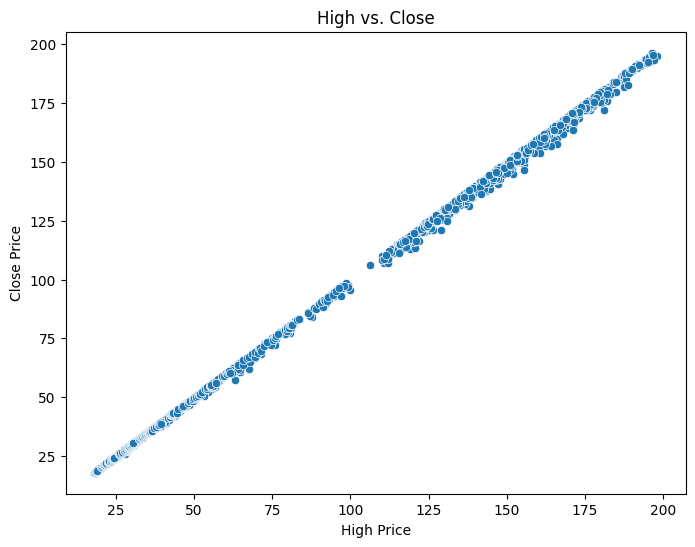

In [13]:
# Scatter plot: High vs. Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x='High', y='Close', data=df)
plt.title('High vs. Close')
plt.xlabel('High Price')
plt.ylabel('Close Price')
plt.show()

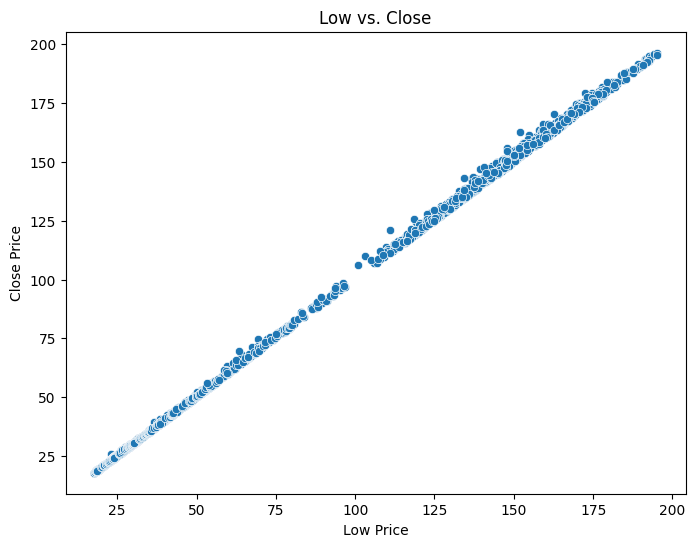

In [15]:
# Scatter plot: Low vs. Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Low', y='Close', data=df)
plt.title('Low vs. Close')
plt.xlabel('Low Price')
plt.ylabel('Close Price')
plt.show()

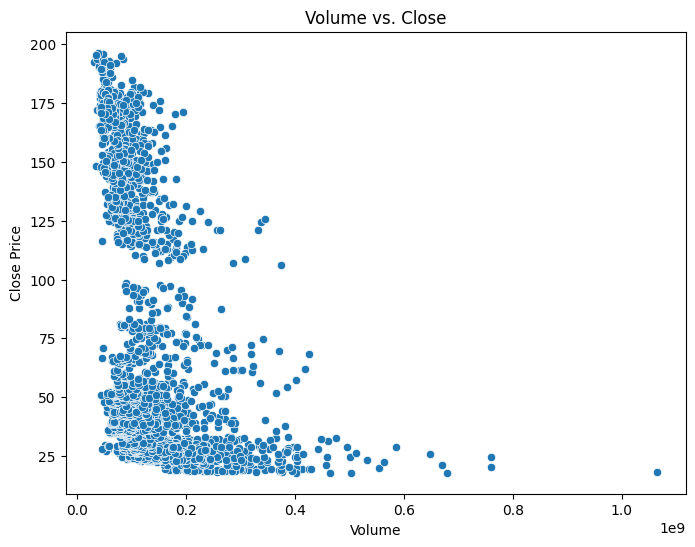

In [16]:
# Scatter plot: Volume vs. Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Volume vs. Close')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

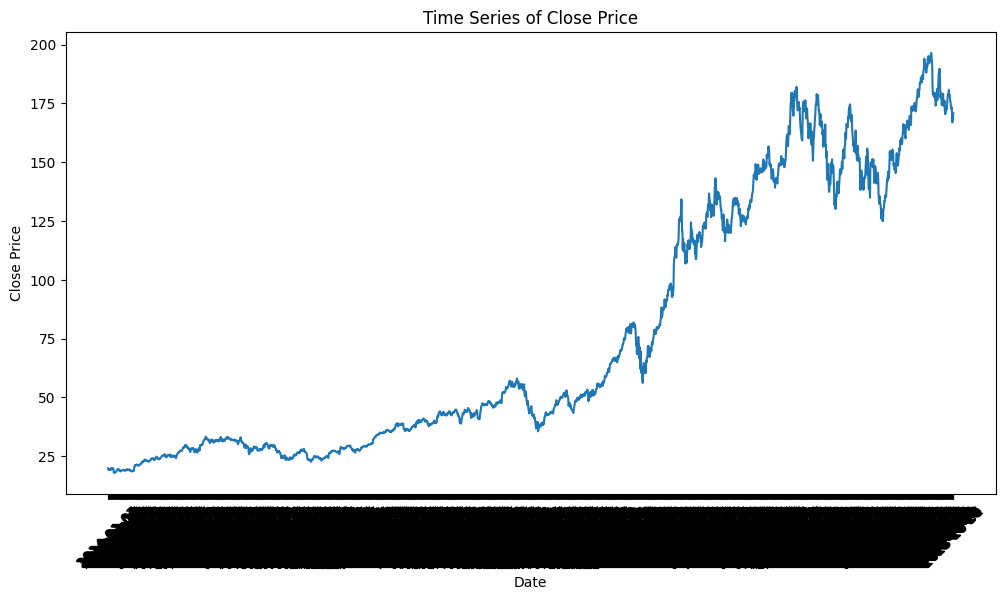

In [17]:
# Time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

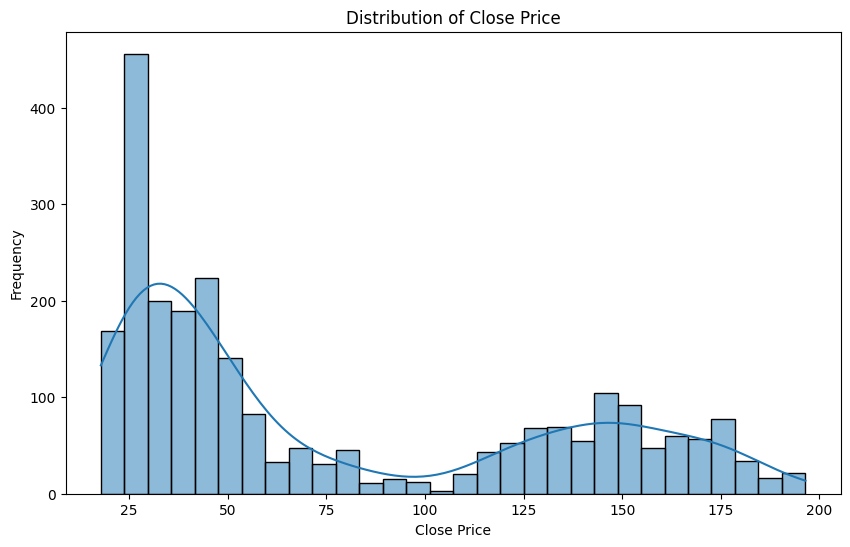

In [19]:
# Visualize the distribution of the target variable (e.g., Close price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Check for missing values again
missing_values_after = df.isnull().sum()
print(missing_values_after)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [22]:
# Select features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1980, 4)
X_test shape: (495, 4)
y_train shape: (1980,)
y_test shape: (495,)


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Display the range of values for each feature before scaling
print("Before Scaling:")
print("  Open:   ", df['Open'].min(), "-", df['Open'].max())
print("  High:   ", df['High'].min(), "-", df['High'].max())
print("  Low:    ", df['Low'].min(), "-", df['Low'].max())
print("  Volume: ", df['Volume'].min(), "-", df['Volume'].max())

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Display the range of values for each feature after scaling
print("\nAfter Scaling:")
print("  Open:   ", X_train_scaled[:, 0].min(), "-", X_train_scaled[:, 0].max())
print("  High:   ", X_train_scaled[:, 1].min(), "-", X_train_scaled[:, 1].max())
print("  Low:    ", X_train_scaled[:, 2].min(), "-", X_train_scaled[:, 2].max())
print("  Volume: ", X_train_scaled[:, 3].min(), "-", X_train_scaled[:, 3].max())


Before Scaling:
  Open:    17.684999465942383 - 196.2400054931641
  High:    17.911785125732422 - 198.22999572753903
  Low:     17.626785278320312 - 195.27999877929688
  Volume:  31458200 - 1065523200

After Scaling:
  Open:    0.0 - 1.0
  High:    0.0 - 0.9999999999999999
  Low:     0.0 - 1.0
  Volume:  0.0 - 0.9999999999999998


In [24]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Transform the test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.44070954350115


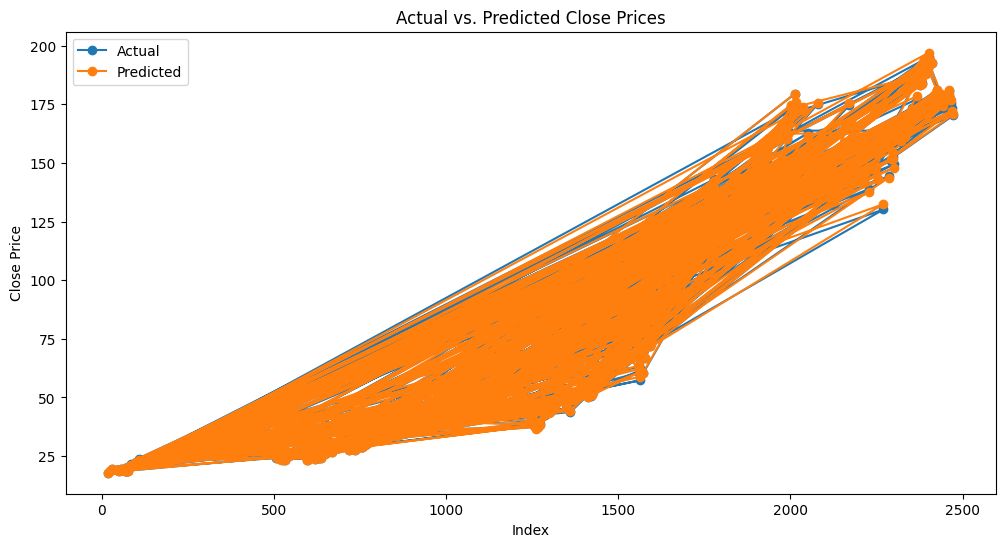

In [25]:
# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', marker='o')
plt.title('Actual vs. Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [26]:
# Display a portion of actual vs. predicted values
results_table = results_df.head(10)  # Displaying the first 10 rows for example
print(results_table)

          Actual   Predicted
873    36.467499   36.325398
2037  172.899994  174.021691
952    39.000000   39.193053
1615   81.279999   81.011215
1712  117.510002  118.044949
1234   43.654999   42.896113
1605   78.285004   79.079067
56     19.463928   19.389896
2194  156.899994  157.025478
926    40.477501   40.306096


In [27]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9998534195460914


In [28]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print MSE and MAE
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.44070954350115
Mean Absolute Error: 0.3948083509782271
